<a href="https://colab.research.google.com/github/GAYARRI/machine-learning/blob/master/EjemploML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### herramientas utilizables

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import csv
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from xgboost import plot_importance
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import sqrt
from scipy import stats

# A.-importamos los datos suministrados a un data frame

In [ ]:
new=pd.read_csv('prueba.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# B.- data frame inicial que se someterá a proceso

In [ ]:
new

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,target
0,-1.075456,-0.195745,0.072928,-0.910273,-1.058332,-0.204135,0.014860,-0.245065,1.803615,-2.399954,...,-0.224292,-0.117769,-0.260683,-0.221259,-0.336948,2.681420,-1.360773,0.313471,-0.991100,1
1,-2.396112,-0.453724,-0.833710,0.058765,1.155650,0.459741,0.598471,-0.378185,2.473345,-0.643875,...,0.058764,0.343075,0.395617,-0.121909,-0.103370,-2.025381,0.105647,1.029478,0.059214,1
2,1.845949,-1.460644,0.140147,-1.228809,1.088438,-1.993979,0.143315,-1.696866,0.585152,-1.467743,...,0.552813,1.264767,-0.075427,0.539285,-0.046292,-0.382775,-0.607253,-0.873099,-2.888416,1
3,2.143414,0.101328,1.057411,-1.257740,-0.208287,0.574069,-0.747514,0.475646,1.351055,-0.481845,...,1.041197,-2.248246,-0.047734,-0.042680,-0.729423,0.085604,1.622527,-0.944575,0.403569,1
4,-0.649597,1.017041,-0.588267,0.470996,0.185584,-0.197885,0.740186,-0.865915,-1.130410,0.276091,...,1.154294,1.114312,0.884434,0.880845,0.249226,-0.958378,1.926181,-0.429287,0.153101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-1.101524,0.649155,1.112075,-0.884845,-0.791289,0.511408,-0.980752,0.587925,1.896893,-0.084442,...,3.063000,-1.886854,1.097440,-0.024955,0.303770,0.591723,1.160397,0.284106,-0.583183,0
496,-0.733571,-0.704296,-1.197733,0.822181,-0.131053,-0.367624,-0.125316,-0.248815,-0.431828,-1.207942,...,-0.384192,-0.955502,1.485047,2.312382,1.124695,1.040423,1.287920,-0.982925,-1.212301,0
497,-2.404217,-0.052258,1.072017,-1.049814,-1.276265,-1.430422,1.143976,1.186624,2.066890,1.284893,...,0.531253,-0.638983,0.933560,-0.954446,1.861105,1.512859,1.290044,-0.537628,0.427043,0
498,2.306662,-0.855991,-0.920294,0.802855,1.224822,0.323100,-1.065003,0.081209,-0.417770,-0.455096,...,-0.985940,0.714621,-0.141677,1.201229,-0.502932,1.774207,-0.260103,-0.899428,-0.517996,0


In [ ]:
new.count()

var_1      500
var_2      500
var_3      500
var_4      500
var_5      500
          ... 
var_97     500
var_98     500
var_99     500
var_100    500
target     500
Length: 101, dtype: int64

In [ ]:
z_scores = np.abs(stats.zscore(new))
umbral = 3
filas_con_outliers = (z_scores > umbral).any(axis=1)
casos_con_outliers = new[filas_con_outliers]

new_sin_outliers = new[~filas_con_outliers]

new2=new_sin_outliers





## C.- queremos determinar las variables relevantes para nuestro target,lo que haremos como resultado de un ajuste de un modelo de tipo xgboost de rendimiento contrastado en casos de clasificacion binaria como el que nos ocupa.

In [ ]:
Y=new2['target']
X=new2.drop('target',axis=1)

In [ ]:
Xtrain, XTest, Ytrain, YTest = train_test_split(X, Y, test_size=0.30,random_state=10)

In [ ]:
clf1=xgb.XGBClassifier(eta=0.5,gamma=10,min_child_weight=5.0,subsample=0.6,random=10,label_encoder=False)


In [ ]:
clf1.fit(Xtrain, Ytrain)
pred=clf1.predict(XTest)

[17:30:40] WARNING: ../src/learner.cc:767: 
Parameters: { "label_encoder", "random" } are not used.



<Axes: xlabel='False', ylabel='True'>

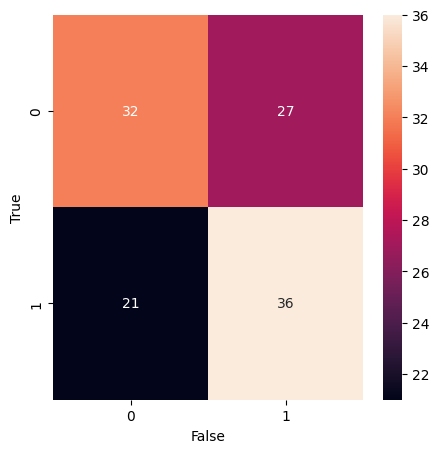

In [ ]:
cm = pd.crosstab(YTest,pred, rownames=['True'], colnames=['False'])
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(YTest, pred))


              precision    recall  f1-score   support

           0       0.60      0.54      0.57        59
           1       0.57      0.63      0.60        57

    accuracy                           0.59       116
   macro avg       0.59      0.59      0.59       116
weighted avg       0.59      0.59      0.59       116



<Figure size 10000x5000 with 0 Axes>

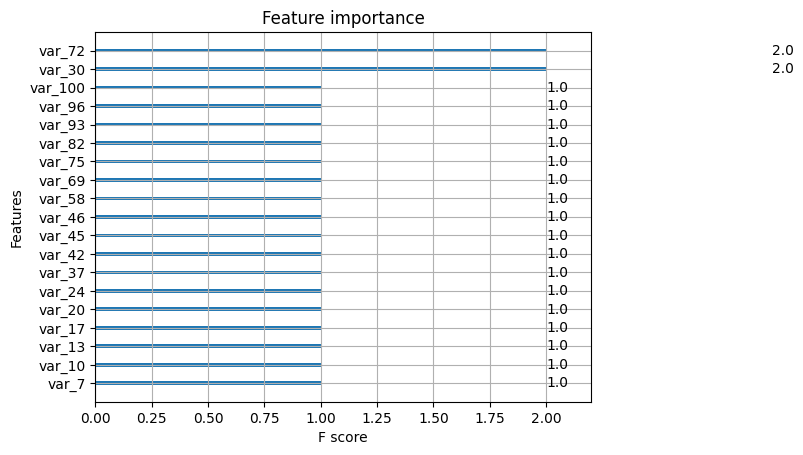

<Figure size 10000x5000 with 0 Axes>

In [ ]:
plot_importance(clf1)
plt.figure(figsize=(100,50))


# Evaluamos utilizando solo las variables qure se han mostrado relevantes para nuesto modelo


In [ ]:
new_3 = new2.filter(['var_72','var_30','var_100','var_93','var_96','var_82','var_75','var_69','var58','var_46','var_45','var_42','var_37','var_24','var_20','var_17','var_13','var_10','var_7','target'])
print(new_3)

       var_72    var_30   var_100    var_93    var_96    var_82    var_75  \
0   -1.547933  2.180610 -0.991100 -0.117769 -0.336948 -1.260558  0.727099   
1   -0.148040  1.698391  0.059214  0.343075 -0.103370  0.572035  1.240636   
2    1.516317  2.086450 -2.888416  1.264767 -0.046292  0.221256  0.230758   
3    2.116917  1.826154  0.403569 -2.248246 -0.729423  0.092953  1.270732   
4    0.380037  2.253610  0.153101  1.114312  0.249226 -1.612397  0.213476   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.808156  3.480979 -0.583183 -1.886854  0.303770 -0.414161 -1.231044   
496  0.692378  2.917139 -1.212301 -0.955502  1.124695 -0.914412 -1.645825   
497  0.010719  2.106763  0.427043 -0.638983  1.861105 -0.471930 -0.040306   
498  0.209883  1.175820 -0.517996  0.714621 -0.502932 -0.167050  0.796403   
499 -1.190860  2.272257 -0.992319  0.689464  1.513155  0.869311 -0.636842   

       var_69    var_46    var_45    var_42    var_37    var_24    var_20  

In [ ]:
Y2=new_3['target']
X2=new_3.drop('target',axis=1)


In [ ]:
X2train, X2Test, Y2train, Y2Test = train_test_split(X2, Y2, test_size=0.30,random_state=100)

In [ ]:
 clf_2=xgb.XGBClassifier(eta=0.5,gamma=10,min_child_weight=5.0,subsample=0.6,random=10,label_encoder=False) #utilizamos el mimsmo modelo e identica parametrizacion

In [ ]:
clf_2.fit(X2train, Y2train)
pred2=clf_2.predict(X2Test)

[17:32:30] WARNING: ../src/learner.cc:767: 
Parameters: { "label_encoder", "random" } are not used.



<Axes: xlabel='False', ylabel='True'>

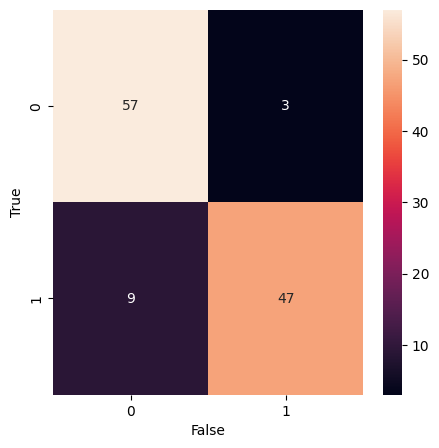

In [ ]:
cm2 = pd.crosstab(Y2Test,pred2, rownames=['True'], colnames=['False'])
plt.figure(figsize=(5,5))
sns.heatmap(cm2,annot=True)

In [ ]:
print(classification_report(Y2Test, pred2))


              precision    recall  f1-score   support

           0       0.86      0.95      0.90        60
           1       0.94      0.84      0.89        56

    accuracy                           0.90       116
   macro avg       0.90      0.89      0.90       116
weighted avg       0.90      0.90      0.90       116



### el resultado es sensiblemente mejor .

## E.- introducimos un modelo de tipo random forest para comparar con nuestro xgboost , a modo de bechmarking

In [ ]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
 max_depth=None, max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
 min_samples_split=3, min_weight_fraction_leaf=0.0,
 n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
 verbose=0, warm_start=False)

rf.fit(X2train,Y2train)

RandomForestClassifier(max_features=None, min_samples_split=3, n_jobs=1)

In [ ]:
predictions = rf.predict(X2Test)

<Axes: xlabel='False', ylabel='True'>

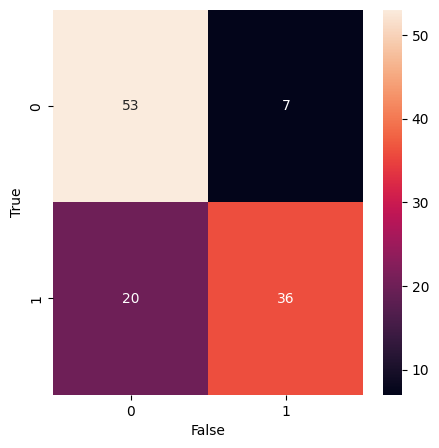

In [ ]:
cm3 = pd.crosstab(Y2Test,predictions, rownames=['True'], colnames=['False'])
plt.figure(figsize=(5,5))
sns.heatmap(cm3,annot=True)

In [ ]:
print(classification_report(Y2Test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        60
           1       0.84      0.64      0.73        56

    accuracy                           0.77       116
   macro avg       0.78      0.76      0.76       116
weighted avg       0.78      0.77      0.76       116



## en un primer vistazo vemos que hay evidencias a favor de nuestro primer modelo.

## F.- iniciamos sobre las versiones parametrizadas de ambos modelos para nuestro set de datos ,un PROCESO DE VALIDACION CRUZADA, para poder emitir un juicio más fundamentado acerca del desempeño de ambos.

In [ ]:
 cv = KFold(n_splits=50, random_state=1, shuffle=True)


In [ ]:
scores = cross_val_score(clf_2, X2, Y2, scoring='accuracy',
                         cv=cv, n_jobs=-1)

### promedios de ajuste del modelo xgboost

In [ ]:
mean(scores)


0.9460714285714286

In [ ]:
scores = cross_val_score(rf, X2, Y2, scoring='recall',
                         cv=cv, n_jobs=-1)


### promedios de ajuste del modelo random forest

In [ ]:
mean(scores)

0.7873333333333333

## ciertamente ambos cumplen un papel más que aceptable ; pero hay evidencias en favor de nuestra eleccion : el xgboost.

## Por otro lado y aunque ya sabemos de antemano el comportamiento queremos certificar que nuestro clasificador no sobreajusta  viendo los kpi's sobre el conjunto de entrenamiento

In [ ]:
print(classification_report(Y2train, pred2b))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       176
           1       0.99      0.97      0.98       174

    accuracy                           0.98       350
   macro avg       0.98      0.98      0.98       350
weighted avg       0.98      0.98      0.98       350



# # modulo de calculo de valores nuevos

In [ ]:
##################################### creamos un vector para introducir los nuevos valores a predecir
inferences = pd.DataFrame()

inferences['var_72'] = None
inferences['var_30'] = None
inferences['var_100'] = None
inferences['var_93'] = None
inferences['var_96'] = None
inferences['var_82'] = None
inferences['var_75'] = None
inferences['var_69'] = None
inferences['var_46'] = None
inferences['var_45'] = None
inferences['var_42'] = None
inferences['var_37'] = None
inferences['var_24'] = None
inferences['var_20'] = None
inferences['var_17'] = None
inferences['var_13'] = None
inferences['var_10'] = None
inferences['var_7'] = None


########################################### apartado de introdución de nuevos valores

inferences['var_72'] = 0,1
inferences['var_30'] = 0,17
inferences['var_100'] = 0,15
inferences['var_93'] = 0,11
inferences['var_96'] = 0,25
inferences['var_82'] = -0,16
inferences['var_75'] = -0,24
inferences['var_69'] = 0,6
inferences['var_46'] = 0,6
inferences['var_45'] = 0,8
inferences['var_42'] = -0,4
inferences['var_37'] = -0,9
inferences['var_24'] = 0,6
inferences['var_20'] = -0,14
inferences['var_17'] = 0,25
inferences['var_13'] = -0,55
inferences['var_10'] = -0,148
inferences['var_7'] = -0,96




In [ ]:
predictions = clf_2.predict(inferences)
probabilities = clf_2.predict_proba(inferences)

In [ ]:
print(predictions)
print (probabilities) ################################  clasificacion del nuevo valor introducido


[0 1]
[[0.925256   0.07474396]
 [0.30442798 0.695572  ]]
